In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
sample=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [7]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler,RobustScaler

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

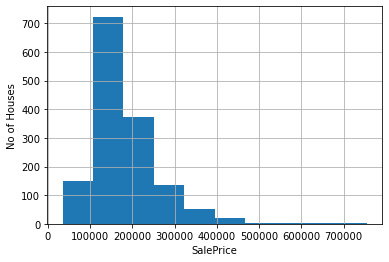

In [11]:
train['SalePrice'].hist()
plt.ylabel("No of Houses")
plt.xlabel("SalePrice")
plt.show()

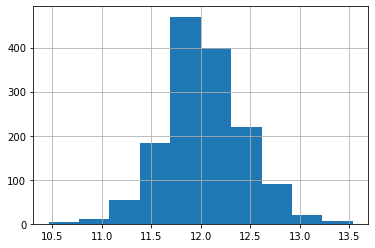

In [12]:
np.log(train['SalePrice']).hist()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


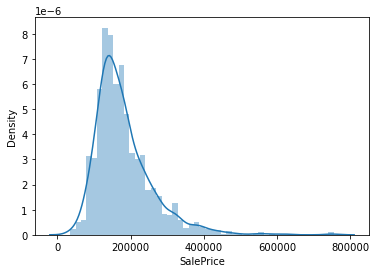

In [13]:
sns.distplot(train['SalePrice'])
plt.show()

In [14]:
#check missing values
missings=train.isna().sum()

missings[missings>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<AxesSubplot:>

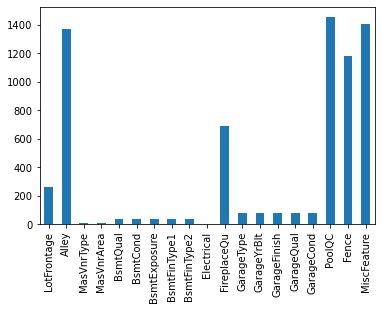

In [15]:
missings[missings>0].plot.bar()

In [16]:
#impute missings
def missing_impute(df):
    for col in df.columns:
        if col=='SalePrice':
            continue
        if df[col].dtype == "float64" or df[col].dtype == "int64":
            df.loc[df[col].isnull() == True,col] = df[col].median()
        else:
            df.loc[df[col].isnull() == True,col] = df[col].mode()[0]
    return df

In [17]:
df_train_imputes=missing_impute(train)
df_train_imputes

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,RL,62.0,7917.0,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457.0,20,RL,85.0,13175.0,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458.0,70,RL,66.0,9042.0,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459.0,20,RL,68.0,9717.0,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


<AxesSubplot:>

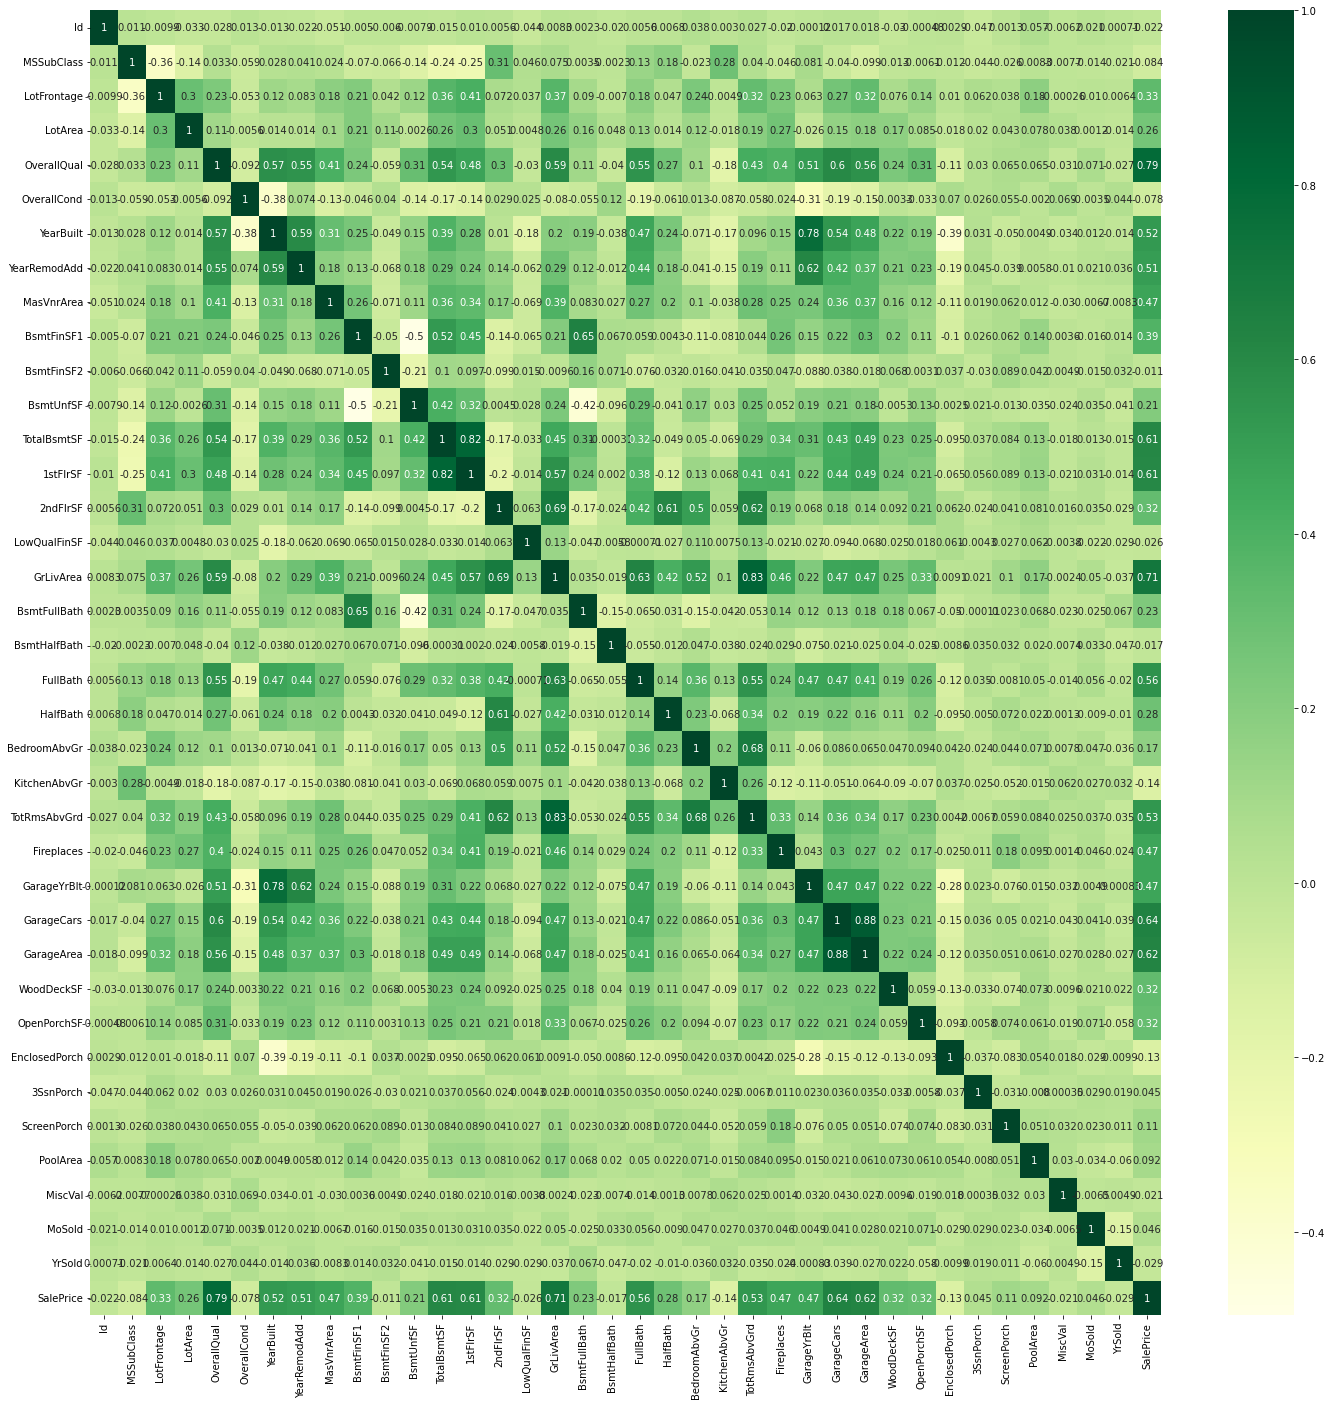

In [18]:
corr_df=df_train_imputes.select_dtypes(["int64","float64"]).corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr_df, annot=True, cmap='YlGn')
    

<AxesSubplot:>

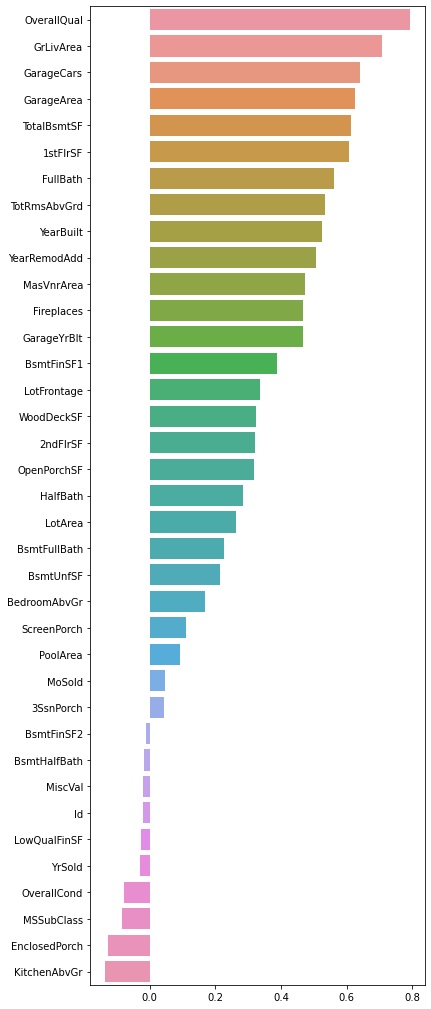

In [19]:
corrn=df_train_imputes.select_dtypes(["int64","float64"]).corr()['SalePrice'].sort_values(ascending = False)[1:]
plt.figure(figsize = (6,18))
sns.barplot(y = list(corrn.index), x = corrn.values, orient = 'h')

In [20]:
df_test_imputes=missing_impute(test)
df_test_imputes

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [21]:
cat_cols_train=df_train_imputes.select_dtypes(object).columns
cat_cols_train

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
cat_cols_test=df_test_imputes.select_dtypes(object).columns
cat_cols_test

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
data_df_train=pd.get_dummies(df_train_imputes,columns=cat_cols_train)
data_df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2.0,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4.0,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5.0,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,62.0,7917.0,6,5,1999,2000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457.0,20,85.0,13175.0,6,6,1978,1988,119.0,790.0,...,0,0,0,1,0,0,0,0,1,0
1457,1458.0,70,66.0,9042.0,7,9,1941,2006,0.0,275.0,...,0,0,0,1,0,0,0,0,1,0
1458,1459.0,20,68.0,9717.0,5,6,1950,1996,0.0,49.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
data_df_test=pd.get_dummies(df_test_imputes,columns=cat_cols_test)
data_df_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
data_df_train1,data_df_test1 = data_df_train.align(data_df_test, join='outer', axis=1, fill_value=0)

In [26]:
data_df_train1

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,0,3,1,0,0,0,...,0,1,8,856.0,1,0,0,2003,2003,2008
1,1262,0,0,1,0,3,1,0,0,0,...,0,1,6,1262.0,1,0,298,1976,1976,2007
2,920,866,0,1,0,3,1,0,0,0,...,0,1,6,920.0,1,0,0,2001,2002,2008
3,961,756,0,1,0,3,1,0,0,0,...,0,1,7,756.0,1,0,0,1915,1970,2006
4,1145,1053,0,1,0,4,1,0,0,0,...,0,1,9,1145.0,1,0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,1,0,3,1,0,0,0,...,0,1,7,953.0,1,0,0,1999,2000,2007
1456,2073,0,0,1,0,3,1,0,0,0,...,0,1,7,1542.0,1,0,349,1978,1988,2010
1457,1188,1152,0,1,0,4,1,0,0,0,...,0,1,9,1152.0,1,0,0,1941,2006,2010
1458,1078,0,0,1,0,2,1,0,0,0,...,0,1,5,1078.0,1,0,366,1950,1996,2010


In [27]:
#scaler = StandardScaler()
#n_data= scaler.fit_transform(numeric_df)

In [28]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
def scaledata(df):
    features_scale=[]
    for col in df.columns:
        if col =='SalePrice':
            pass
        else:
            features_scale.append(col)
    scaler=MinMaxScaler()
    scaler.fit(df[features_scale])
    final_data=pd.DataFrame(scaler.transform(df[features_scale]),columns=features_scale)
    return final_data


In [29]:
#new
#scale the data
from sklearn.preprocessing import MinMaxScaler
def scaledata(df):
    scaler=MinMaxScaler()
    scaler.fit(df)
    final_data=pd.DataFrame(scaler.transform(df),columns=df.columns)
    return final_data

In [30]:
train_data=scaledata(data_df_train1)

In [31]:
train_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.119780,0.413559,0.0,1.0,0.0,0.375,1.0,0.0,0.0,0.0,...,0.0,1.0,0.500000,0.140098,1.0,0.0,0.000000,0.949275,0.883333,0.50
1,0.212942,0.000000,0.0,1.0,0.0,0.375,1.0,0.0,0.0,0.0,...,0.0,1.0,0.333333,0.206547,1.0,0.0,0.347725,0.753623,0.433333,0.25
2,0.134465,0.419370,0.0,1.0,0.0,0.375,1.0,0.0,0.0,0.0,...,0.0,1.0,0.333333,0.150573,1.0,0.0,0.000000,0.934783,0.866667,0.50
3,0.143873,0.366102,0.0,1.0,0.0,0.375,1.0,0.0,0.0,0.0,...,0.0,1.0,0.416667,0.123732,1.0,0.0,0.000000,0.311594,0.333333,0.00
4,0.186095,0.509927,0.0,1.0,0.0,0.500,1.0,0.0,0.0,0.0,...,0.0,1.0,0.583333,0.187398,1.0,0.0,0.224037,0.927536,0.833333,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.142038,0.336077,0.0,1.0,0.0,0.375,1.0,0.0,0.0,0.0,...,0.0,1.0,0.416667,0.155974,1.0,0.0,0.000000,0.920290,0.833333,0.25
1456,0.399036,0.000000,0.0,1.0,0.0,0.375,1.0,0.0,0.0,0.0,...,0.0,1.0,0.416667,0.252373,1.0,0.0,0.407235,0.768116,0.633333,1.00
1457,0.195961,0.557869,0.0,1.0,0.0,0.500,1.0,0.0,0.0,0.0,...,0.0,1.0,0.583333,0.188543,1.0,0.0,0.000000,0.500000,0.933333,1.00
1458,0.170721,0.000000,0.0,1.0,0.0,0.250,1.0,0.0,0.0,0.0,...,0.0,1.0,0.250000,0.176432,1.0,0.0,0.427071,0.565217,0.766667,1.00


In [32]:
#new
train_Y1=train_data['SalePrice']

In [33]:
train_X1=train_data.drop(columns='SalePrice')

In [34]:
train_Y=data_df_train1['SalePrice']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f22e85e1310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f22e85e1990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f22e85dbf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f22e85e1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f22e85eb1d0>],
 'means': []}

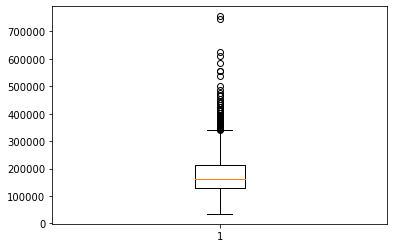

In [35]:
plt.boxplot(train_Y)

In [36]:
linear_reg=LinearRegression()
linear_reg.fit(train_X1,train_Y1)
Y_pred_train=linear_reg.predict(train_X1)
Y_pred_train

array([0.23978353, 0.23751112, 0.23711136, ..., 0.33365892, 0.15109737,
       0.16156391])

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(train_Y1,Y_pred_train)

0.018540191190819625

In [38]:
linear_reg.score(train_X1,train_Y1)

0.932192847127252

In [39]:
linear_reg.score(train_X1,Y_pred_train)

1.0

In [40]:
test_data=scaledata(data_df_test1)
test_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.104309,0.000000,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,...,0.0,1.0,0.166667,0.173111,0.0,0.0,0.098315,0.625954,0.183333,1.0
1,0.196672,0.000000,0.0,1.0,0.0,0.500000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.250000,0.260844,0.0,0.0,0.275983,0.603053,0.133333,1.0
2,0.111135,0.376477,0.0,1.0,0.0,0.500000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.250000,0.182139,0.0,0.0,0.148876,0.900763,0.800000,1.0
3,0.110708,0.364125,0.0,1.0,0.0,0.500000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.333333,0.181747,0.0,0.0,0.252809,0.908397,0.800000,1.0
4,0.186220,0.000000,0.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.0,...,0.0,1.0,0.166667,0.251227,0.0,0.0,0.000000,0.862595,0.700000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.029650,0.293233,0.0,1.0,0.0,0.500000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.166667,0.107164,0.0,0.0,0.000000,0.694656,0.333333,0.0
1455,0.029650,0.293233,0.0,1.0,0.0,0.500000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.250000,0.107164,0.0,0.0,0.000000,0.694656,0.333333,0.0
1456,0.174275,0.000000,0.0,1.0,0.0,0.666667,1.0,0.0,0.0,0.0,...,0.0,1.0,0.333333,0.240236,0.0,0.0,0.332865,0.618321,0.766667,0.0
1457,0.120094,0.000000,0.0,1.0,0.0,0.500000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.250000,0.178999,0.0,0.0,0.056180,0.862595,0.700000,0.0


In [41]:
#new
X_test=test_data.drop(columns='SalePrice')


In [42]:
Y_pred_test=linear_reg.predict(X_test)
Y_pred_test

array([0.17690033, 0.23918921, 0.29306431, ..., 0.30140806, 0.16800168,
       0.3335092 ])

In [43]:
linear_reg.score(X_test,Y_pred_test)

1.0

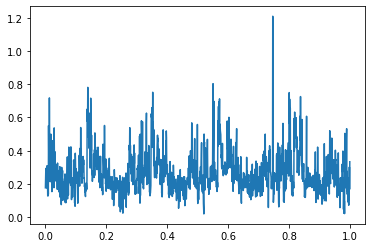

In [44]:
plt.plot(X_test['Id'],Y_pred_test)


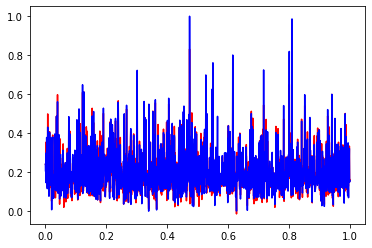

In [45]:
plt.plot(train_X1['Id'],Y_pred_train,color='red')
plt.plot(train_X1['Id'],train_Y1,color='blue')

In [46]:
import matplotlib.pyplot as plt
plt.plot?

(array([122., 711., 411., 128.,  64.,  18.,   4.,   0.,   0.,   1.]),
 array([0.01956186, 0.13854116, 0.25752045, 0.37649974, 0.49547904,
        0.61445833, 0.73343763, 0.85241692, 0.97139621, 1.09037551,
        1.2093548 ]),
 <BarContainer object of 10 artists>)

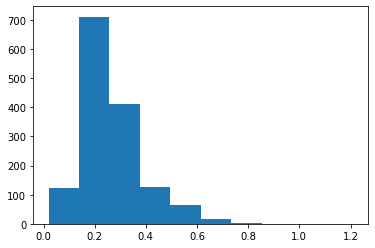

In [47]:
plt.hist(Y_pred_test)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
tuned_param=[{'alpha':[0.01,0.1,1,10,100]}]
RidgeCV=GridSearchCV(linear_model.Ridge(),tuned_param,cv=5,n_jobs=-1,scoring='neg_mean_squared_error',verbose=2)
RidgeCV.fit(train_X1,train_Y1)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
RidgeCV.best_params_

{'alpha': 10}

In [50]:
y_pred_rcv = RidgeCV.predict(X_test)
y_pred_rcv

array([0.14548622, 0.20301652, 0.23824186, ..., 0.21290513, 0.1431887 ,
       0.29609125])

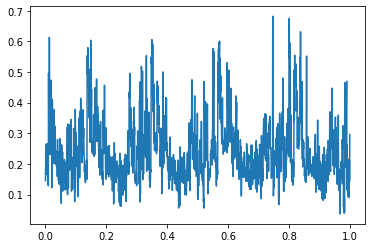

In [51]:
plt.plot(X_test['Id'],y_pred_rcv)

(array([ 40., 267., 510., 314., 155.,  67.,  55.,  30.,  17.,   4.]),
 array([0.03689716, 0.10139876, 0.16590036, 0.23040196, 0.29490356,
        0.35940515, 0.42390675, 0.48840835, 0.55290995, 0.61741155,
        0.68191314]),
 <BarContainer object of 10 artists>)

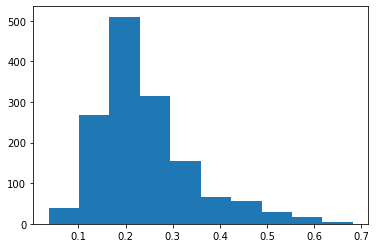

In [52]:
plt.hist(y_pred_rcv)

(array([122., 711., 411., 128.,  64.,  18.,   4.,   0.,   0.,   1.]),
 array([0.01956186, 0.13854116, 0.25752045, 0.37649974, 0.49547904,
        0.61445833, 0.73343763, 0.85241692, 0.97139621, 1.09037551,
        1.2093548 ]),
 <BarContainer object of 10 artists>)

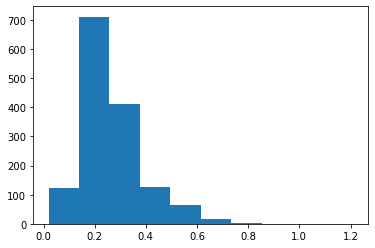

In [53]:
plt.hist(Y_pred_test)

In [54]:
r_squared =  RidgeCV.score(X_test,Y_pred_test)
r_squared

-0.0018524401107621457

In [55]:
RidgeCV.score(train_X1,train_Y1)

-0.001311157267089074

In [56]:
'R Square of the model: {:.1%}'.format(r_squared)

'R Square of the model: -0.2%'

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
tuned_param=[{'alpha':[0.01,0.1,1,10,100]}]
ElasticCV=GridSearchCV(linear_model.ElasticNet(),tuned_param,cv=5,n_jobs=-1,scoring='neg_mean_squared_error',verbose=2)
ElasticCV.fit(train_X1,train_Y1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error', verbose=2)

In [58]:
y_pre=ElasticCV.predict(X_test)
y_pre

array([0.11723779, 0.16587035, 0.19671754, ..., 0.13975048, 0.15569656,
       0.21063839])

In [59]:
ElasticCV.score(train_X1,train_Y1)

-0.00457872607418516

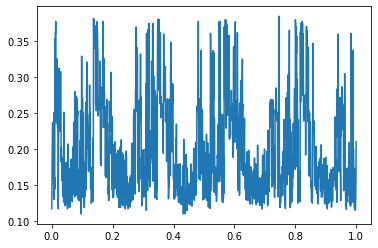

In [60]:
plt.plot(X_test['Id'],y_pre)

(array([266., 335., 241., 111., 135., 191.,  52.,  31.,  29.,  68.]),
 array([0.1100893 , 0.13756881, 0.16504832, 0.19252784, 0.22000735,
        0.24748687, 0.27496638, 0.30244589, 0.32992541, 0.35740492,
        0.38488444]),
 <BarContainer object of 10 artists>)

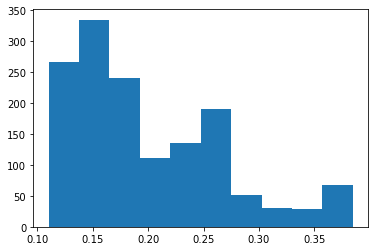

In [61]:
plt.hist(y_pre)